# Анализ популярности компьютерных игр

Здравствуйте! Мы - сотрудники интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. 

Мы решили провести исследование по данным до 2016 года из открытых источников, чтобы выявить определяющие успешность игры закономерности. 

Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

Все данные взяты из открытых источников: исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

# 1. Откроем файл с данными и изучим общую информацию
Путь к файлу: /datasets/games.csv. 






### Описание данных
Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB. Подходящую возрастную категорию.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


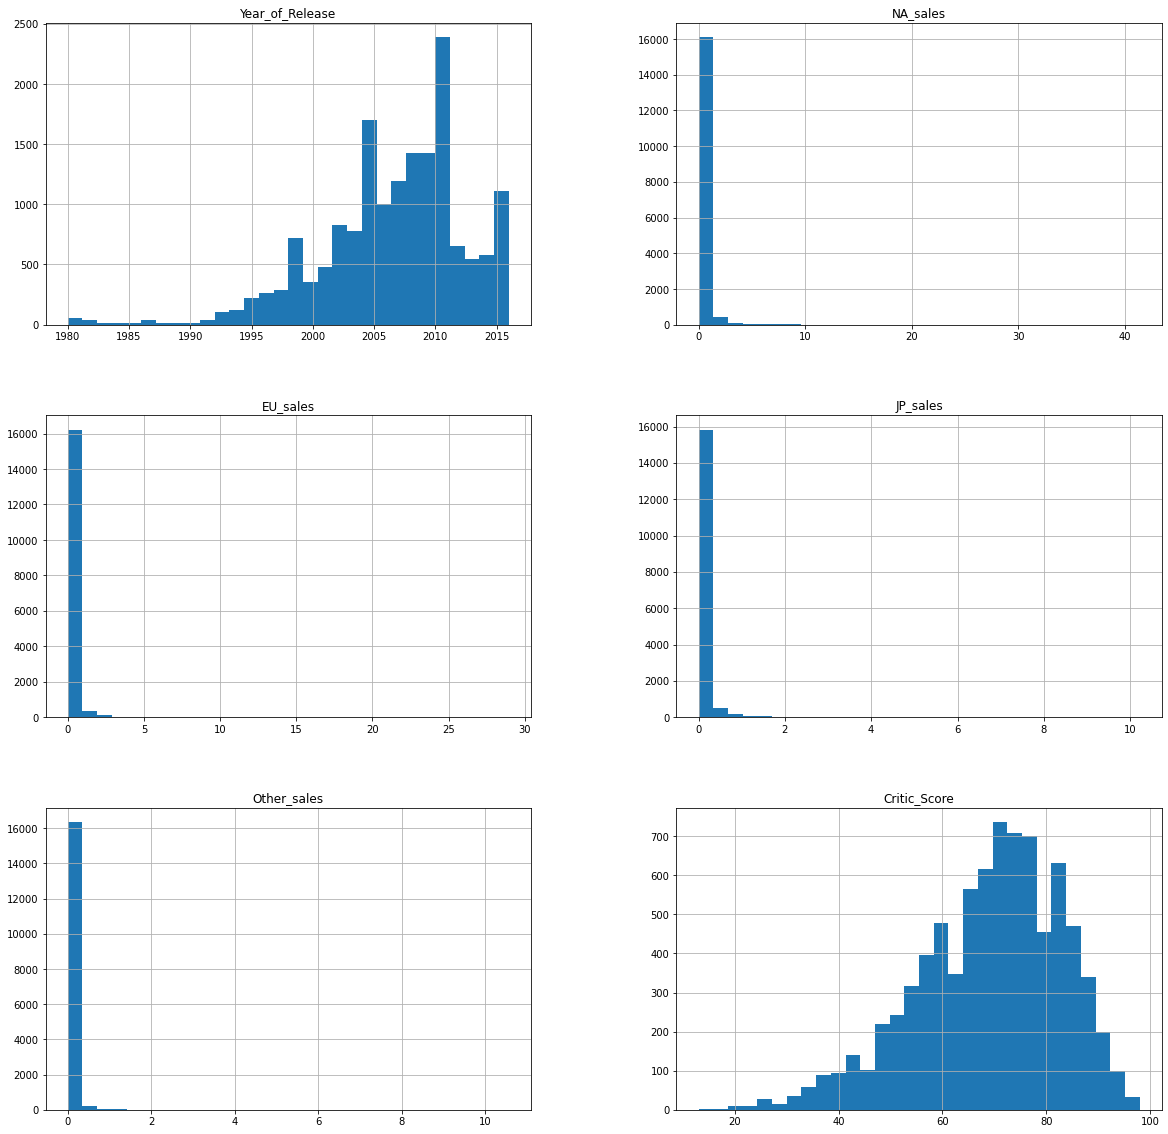

In [5]:
data.hist(figsize=(20,20), bins=30)
plt.show()

**Вывод:**

При первичном знакомстве с данными обнаружены следующие проблемы:

* Названия столбцов не соответствуют общеприятым (начинаются с прописных букв)
* Столбцы Year_of_Release, User_Score имеют неправильный тип данных
* В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating есть пропуски

По гистограммам для каждого из столбцов можно увидеть распределение данных.

* Игры, присутствующие в датасете, были выпущены в период с 1980 по 2016 годы. Больше всего игр выпустили в 2010 году.
* Количество проданных копий в разных регионах имеют схожие распределения: пик рядом с нулём, то есть большая часть данных это 1-2 млн проданных копий. 
* Оценки критиков лежат в пределах 0-100. Большая часть находится в промежутке от 50 до 90.

# 2. Подготовим данные
### Заменим названия столбцов (приведём к нижнему регистру);


In [6]:
new_columns = []
for i in data:
    i_new = i.lower()
    new_columns.append(i_new)
data.columns = new_columns
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей.** 

tbd - To Be Determined (англ.). Можно перевести как "будет определена". 

То есть пока что оценки для этих игр нет. Можно заменить это значение на NaN.

In [7]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

###  Обработаем пропуски.

В столбцах `name` и `year_of_release` всего несколько пропусков. Поэтому можно ими пренебречь. 

Остальные данные же могут сильно пострадать, если удалить строки с пропусками или заменить их на какие-либо значения. 

Поэтому оставим их как есть.


In [8]:
pd.__version__

'1.2.4'

In [9]:
data = data.dropna(subset=['name'])
data = data.dropna(subset=['year_of_release'])
# data.info()

### Преобразуем данные в нужные типы. 

Столбец `year_of_release` должен иметь тип object, a `user_score` - float

In [10]:
data['year_of_release'] = data['year_of_release'].fillna(0).astype(int).astype(object)
data['user_score'] = data['user_score'].astype('float64')
# data.info()
# data

### Проверим данные на полные дубликаты строк. 

In [11]:
data.duplicated().sum()

0

###  Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [12]:
data['all_sales'] = (data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']).round(2)
# data['all_sales']

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> 
    
Тут можно использовать метод `DataFrame.sum` с аргументом `axis=1`</div>

```python

        df['total_sum'] = df[['value_1', 'value_2', 'value_3', 'value_4']].sum(axis=1)
    
```

In [13]:
# data.head()

**Вывод:**

Во время предобработки данных были произведены следующие действия:

* Названия столбцов приведены к нижнему регистру
* Аббревиатура tbd заменена на NаN
* В столбцах name и year_of_release удалены строки с пропусками
* Типы данных столбцов year_of_release и user_score приведены к правильным
* В датасет добавлен новый столбец с суммарными продажами all_sales

# 3. Проведём исследовательский анализ данных
###  Посмотрим, сколько игр выпускалось в разные годы. 

<AxesSubplot:>

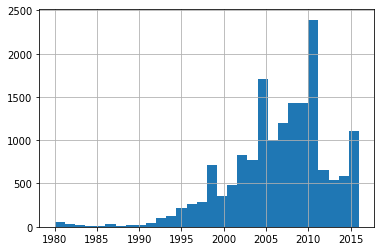

In [14]:
data['year_of_release'].hist(bins=30)

In [15]:
data = data.loc[data['year_of_release'] > 1995]

**Вывод:**

По графику выше видим, что в 1980-1995 выпускалось крайне мало игр. 

В это время ещё далеко не у каждого человека и даже семьи был компьютер.

Так что в анализ нужно брать данные с 1995 и позднее.

### Посмотрим, как менялись продажи по платформам. 

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [16]:
# data['all_sales'].hist(bins=30)

In [17]:
big_platforms = data.groupby('platform').agg({'all_sales': 'sum'}).sort_values(by='all_sales').tail(5).index.to_list()

In [18]:
# код ревьюера
data.groupby('platform').agg({'all_sales': 'sum'}).sort_values(by='all_sales').tail(6).index.to_list()

['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']

DS


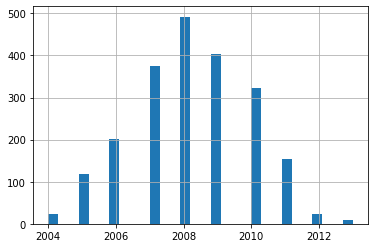

Wii


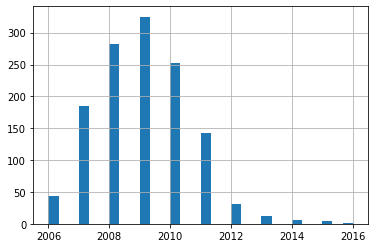

PS3


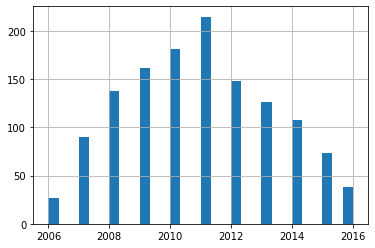

X360


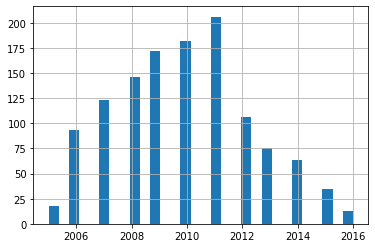

PS2


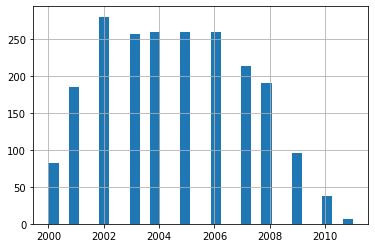

In [19]:
for p in big_platforms:
    p_data = data.loc[data['platform'] == p]
    print(p)
    p_data['year_of_release'].hist(bins=30)
    plt.show()

In [20]:
data = data.loc[data['year_of_release'] >= 2013]

**Вывод:**

Среднее время существования платформы 6-9 лет. А рост продаж на них составляет примерно половину этого срока.

Возьмём данные за соответствующий актуальный период. 

Поскольку нас интересует прогноз на 2017 год, то в работу возьмём данные начиная с 2013 года.

Данные за предыдущие годы в анализе учтены не будут.


###  Какие платформы лидируют по продажам, растут или падают? 
Выберем несколько потенциально прибыльных платформ. 

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [21]:
# platforms = ['Wii', 'X360', 'PS3', 'PS4', '3DS', 'PC', 'PSP', 'XOne', 'WiiU', 'PSV']
platforms = data['platform'].unique()
platforms

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

PS3 181.43


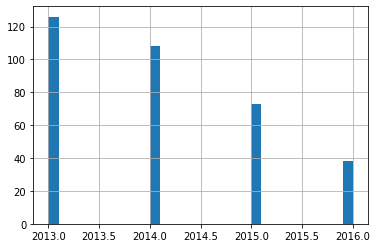

X360 136.8


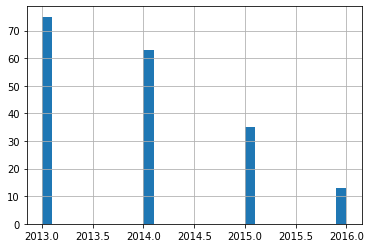

PS4 314.14


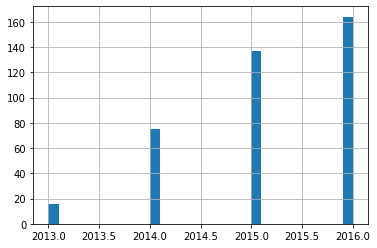

3DS 143.25


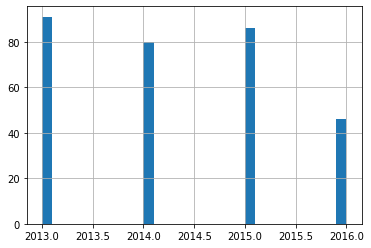

XOne 159.32


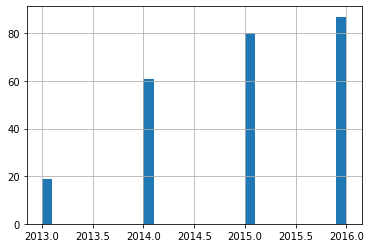

WiiU 64.63000000000001


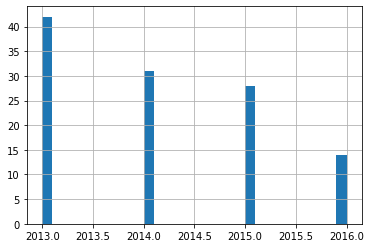

Wii 13.659999999999997


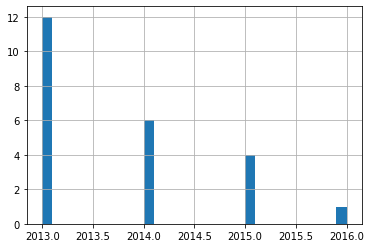

PC 39.42999999999999


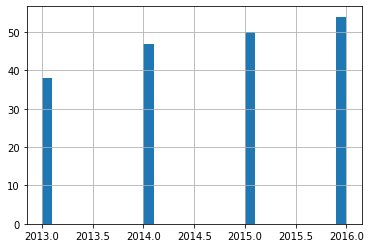

PSV 32.99


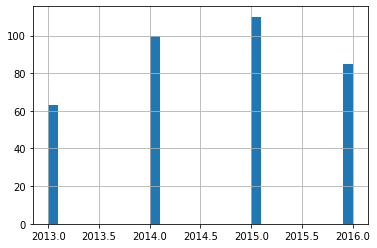

DS 1.54


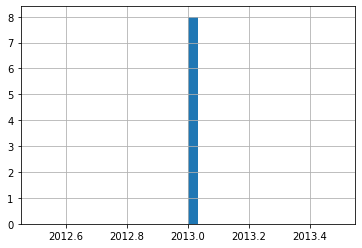

PSP 3.5


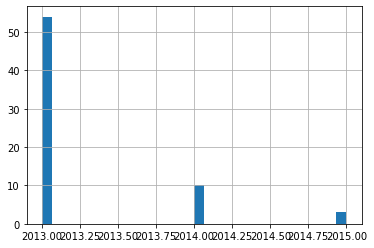

In [22]:
for p in platforms:
    p_data = data.loc[data['platform'] == p]
    sum_sales = p_data['all_sales'].sum()
    print(p, sum_sales)
    p_data['year_of_release'].hist(bins=30)
    plt.show()

Index(['PSP', 'PSV', 'PC', '3DS', 'DS', 'PS3', 'Wii', 'PS4', 'WiiU', 'XOne',
       'X360'],
      dtype='object', name='platform')


(0.0, 2.0)

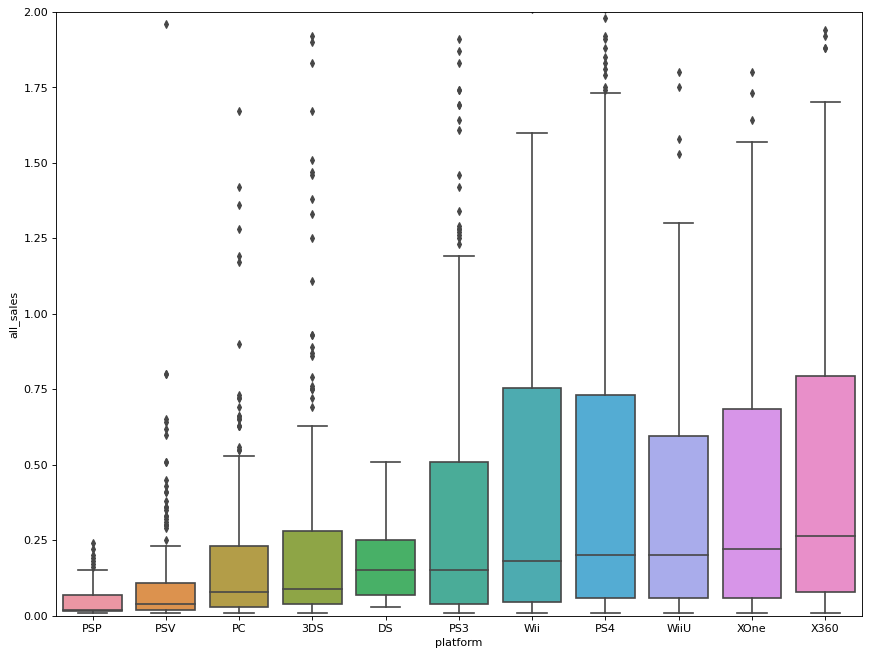

In [23]:
plt.figure(figsize=(13,10), dpi= 80)
my_order = data.groupby(by=["platform"])["all_sales"].median().sort_values().index
print(my_order)
sns.boxplot(x='platform', y='all_sales', data=data, order=my_order)
plt.ylim(0, 2)

**Вывод:**

Были выделены две потенциально прибыльных(находящиеся в зоне роста) платформы: XOne, PS4

Все остальные либо уже прекратили свою работу, либо вот-вот это сделают. Они нам не интересны.

Две выбранные платформы обладают схожими параметрами:

* Основное количество продаж находится в диапазоне 0.01-0.7 млн. 
* Медиана смещена к нижнему значению и равна примерно 0.2 млн.
* Количество значений около 300.


###  Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

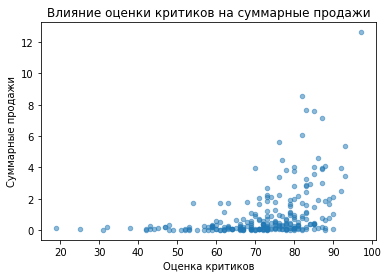

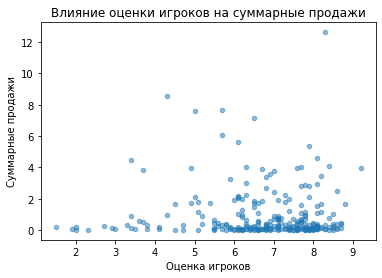

In [24]:
data_p = data.loc[data['platform'] == 'PS4']

data_p.sort_values('critic_score').plot(x='critic_score', y='all_sales', alpha=0.5, kind='scatter')
plt.title("Влияние оценки критиков на суммарные продажи")
plt.xlabel("Оценка критиков")
plt.ylabel("Суммарные продажи")
plt.show()

data_p.sort_values('critic_score').plot(x='user_score', y='all_sales', alpha=0.5, kind='scatter')
plt.title("Влияние оценки игроков на суммарные продажи")
plt.xlabel("Оценка игроков")
plt.ylabel("Суммарные продажи")
plt.show()

In [25]:
print(data_p['critic_score'].corr(data_p['all_sales']))
print(data_p['user_score'].corr(data_p['all_sales']))

0.40656790206178106
-0.031957110204556397


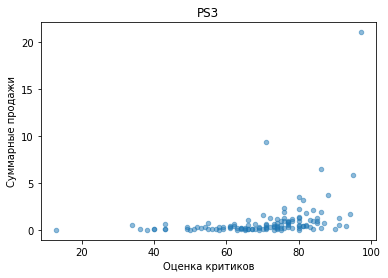

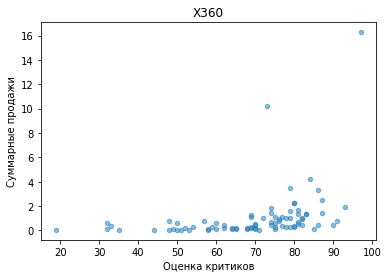

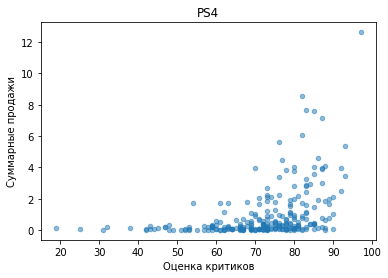

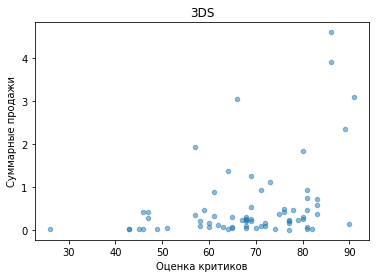

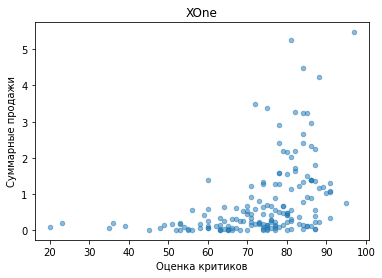

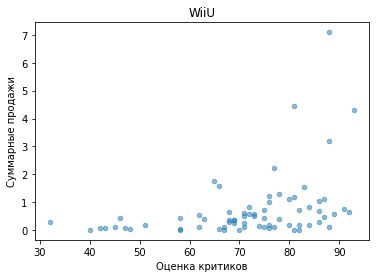

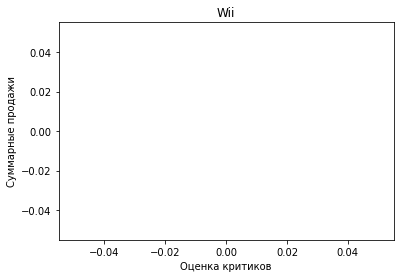

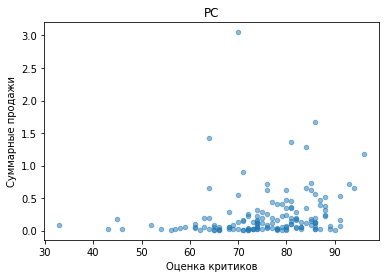

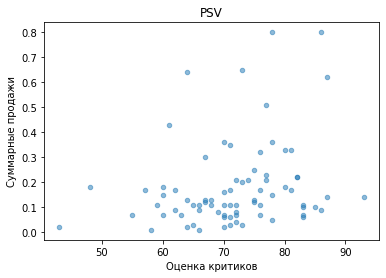

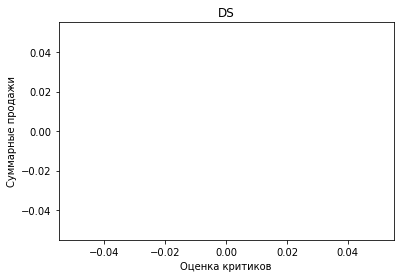

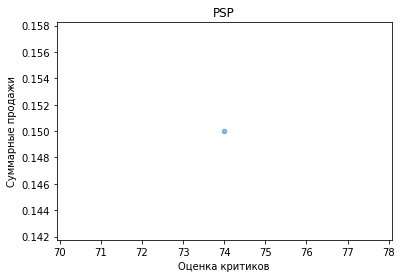

In [26]:
for p in platforms:
    data_p = data.loc[data['platform'] == p]
    
    data_p.sort_values('critic_score').plot(x='critic_score', y='all_sales', alpha=0.5, kind='scatter')
    plt.title(p)
    plt.xlabel("Оценка критиков")
    plt.ylabel("Суммарные продажи")
    plt.show()

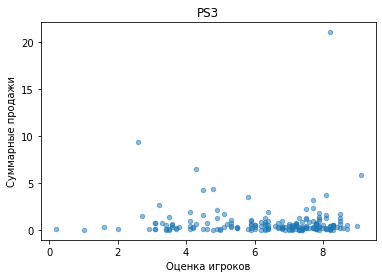

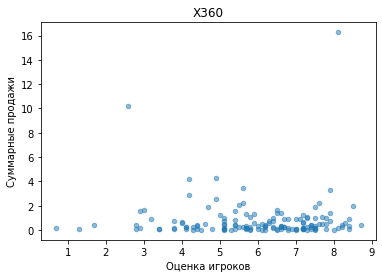

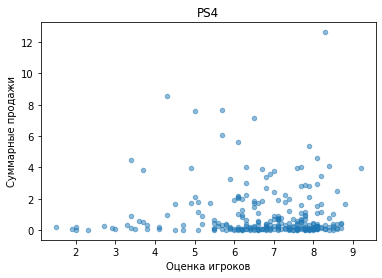

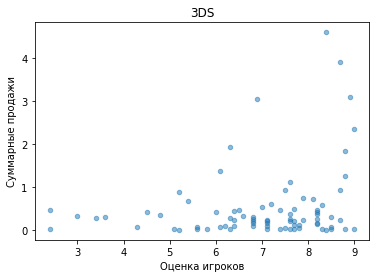

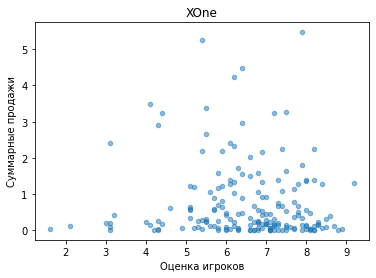

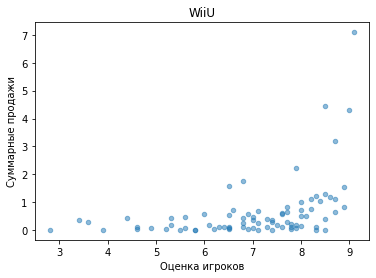

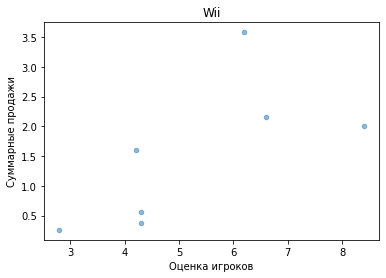

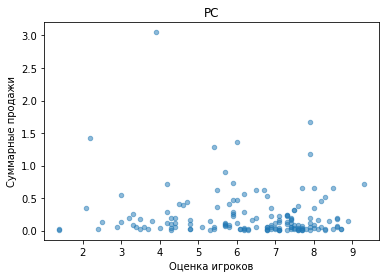

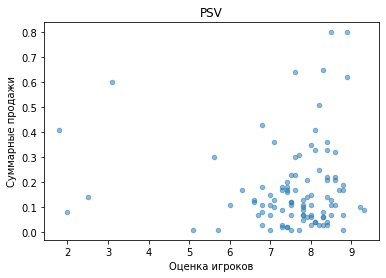

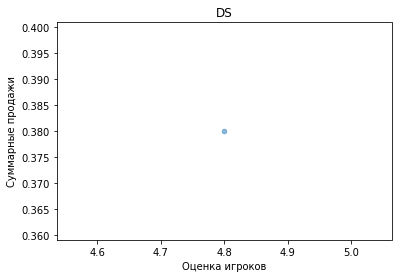

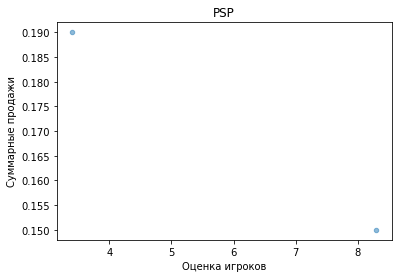

In [27]:
for p in platforms:
    data_p = data.loc[data['platform'] == p]
    
    data_p.sort_values('critic_score').plot(x='user_score', y='all_sales', alpha=0.5, kind='scatter')
    plt.title(p)
    plt.xlabel("Оценка игроков")
    plt.ylabel("Суммарные продажи")
    plt.show()

In [28]:
for p in platforms:
    data_p = data.loc[data['platform'] == p]
    print(p)
    print(data_p['critic_score'].corr(data_p['all_sales']))
    print(data_p['user_score'].corr(data_p['all_sales']))
    print()

PS3
0.3342853393371919
0.002394402735756693

X360
0.3503445460228664
-0.011742185147181335

PS4
0.40656790206178106
-0.031957110204556397

3DS
0.3570566142288103
0.24150411773563016

XOne
0.4169983280084017
-0.0689250532827941

WiiU
0.3764149065423913
0.4193304819266187

Wii
nan
0.6829417215362369

PC
0.19603028294369376
-0.09384186952476743

PSV
0.2547423503068656
0.0009424723319108828

DS
nan
nan

PSP
nan
-0.9999999999999999



/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


**Вывод:**

По графикам какую-либо зависимость разглядеть достаточно сложно. 

Коэфициенты корреляции подтверждают, что продажи мало зависят от оценки критиков, 

а зависимости между оценкой пользователя и продажами нет совсем(она предельно мала).


###  Посмотрим на общее распределение игр по жанрам. 

In [29]:
data_genre = pd.pivot_table(data, index='genre', values='all_sales', aggfunc=['median'])
data_genre.columns=[ 'median']

In [30]:
data_genre.sort_values('median')

,median
genre,
Adventure,0.030
Puzzle,0.060
Strategy,0.080
Misc,0.100
Simulation,0.100
Action,0.110
Racing,0.120
Fighting,0.125
Role-Playing,0.125


**Вывод:**

По сводной таблице видно, что наиболее прибыльным является жанр Shooter. 

Sports, Platform можно так же назвать остаточно прибыльными жанрами

Misc, Role-Playin, Fighting, Simulation, Racing, Action можно отнести к среднеприбыльным 

Strategy, Puzzle, Adventure - эти жанры приносят значительно меньше прибыли.

# 4. Составим портрет пользователя каждого региона
### Определим для пользователя каждого региона (NA, EU, JP): 
### Самые популярные платформы (топ-5).                                           

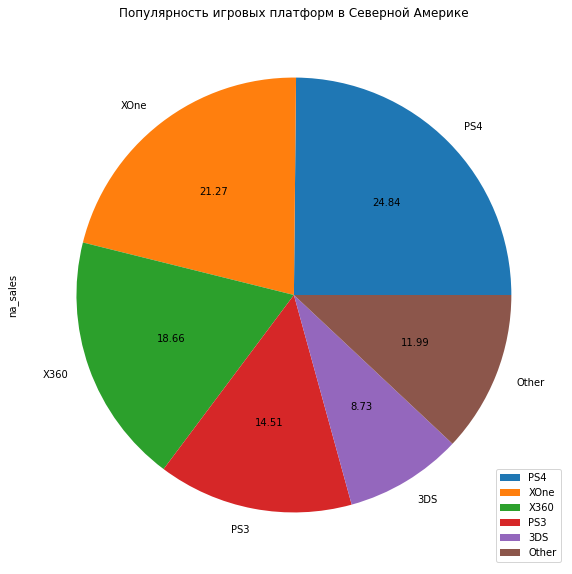

In [31]:
na_sales = data.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)

na_sales_top = na_sales[:5]
na_sales_other = pd.DataFrame([na_sales[5:].sum()], index=['Other'])
na_sales = na_sales_top.append(na_sales_other)

na_sales.plot(kind='pie', y='na_sales', figsize=(13,10), title='Популярность игровых платформ в Северной Америке', autopct="%.2f")
plt.show()

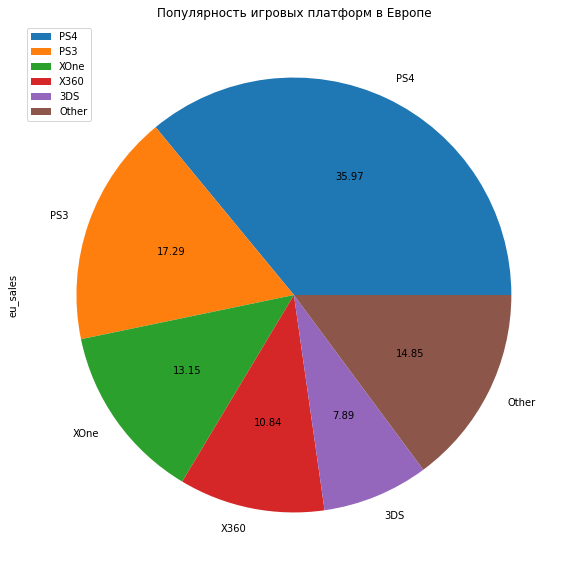

In [32]:
eu_sales = data.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)

eu_sales_top = eu_sales[:5]
eu_sales_other = pd.DataFrame([eu_sales[5:].sum()], index=['Other'])
eu_sales = eu_sales_top.append(eu_sales_other)

eu_sales.plot(kind='pie', y='eu_sales', figsize=(13,10), title='Популярность игровых платформ в Европе', autopct="%.2f")

plt.show()

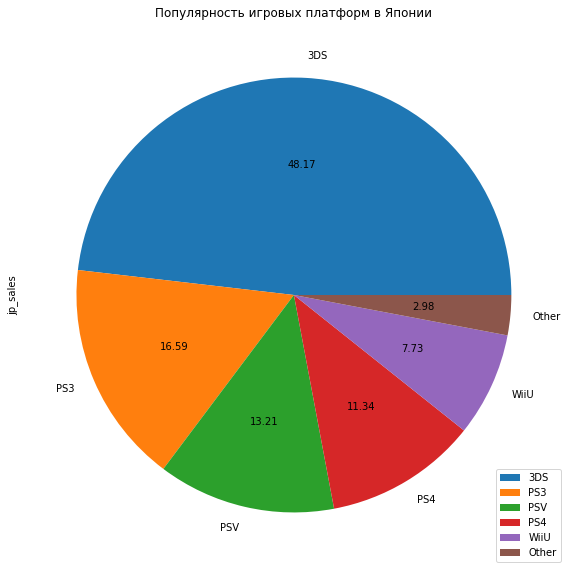

In [33]:
jp_sales = data.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)

jp_sales_top = jp_sales[:5]
jp_sales_other = pd.DataFrame([jp_sales[5:].sum()], index=['Other'])
jp_sales = jp_sales_top.append(jp_sales_other)

jp_sales.plot(kind='pie', y='jp_sales', figsize=(13,10), title='Популярность игровых платформ в Японии', autopct="%.2f")

plt.show()

**Вывод:**

Для Северной Америки пятёрка лидеров по популярности:

* PS4 25%
* XOne 21% 
* X360 19% 
* PS3 15 %
* 3DS 9%


Для Европы:

* PS4 36 % 
* PS3 17 %
* XOne 13 % 
* X360 11 % 
* 3DS 8 %

Для Японии:

* 3DS 48 % 
* PS3 17 % 
* PSV 13 % 
* PS4 11 % 
* WiiU 8 %

Топ-5 самых популярных платформ в Европе и Северной Америке совпадают. Это платформы X360, XOne, PS3, 3DS, PS4.

В Японии же появляются новые названия: WiiU, PSV. 

При этом X360 и XOne в Японии менее распространены -  среди 5 наиболее популярных их нет.


### Самые популярные жанры (топ-5). 

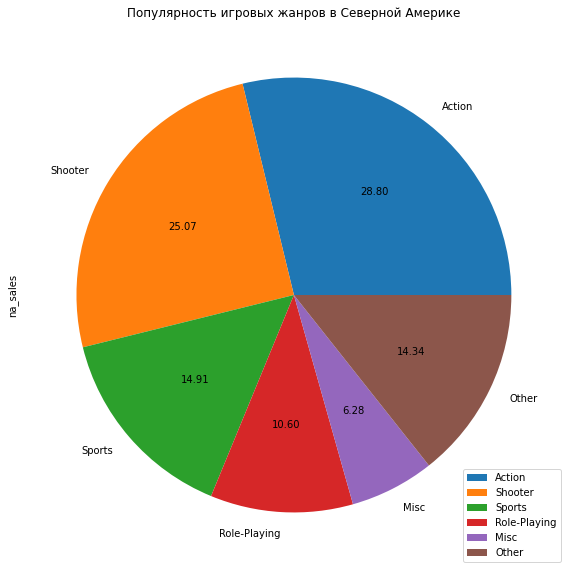

In [34]:
na_sales = data.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)

na_sales_top = na_sales[:5]
na_sales_other = pd.DataFrame([na_sales[5:].sum()], index=['Other'])
na_sales = na_sales_top.append(na_sales_other)

na_sales.plot(kind='pie', y='na_sales', figsize=(13,10), title='Популярность игровых жанров в Северной Америке', autopct="%.2f")
plt.show()

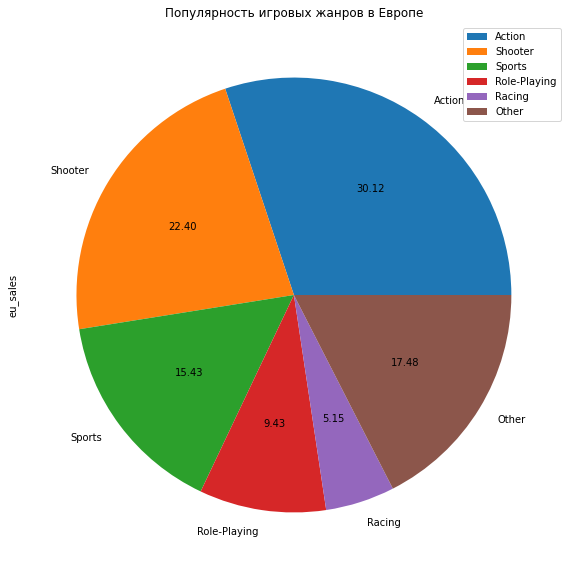

In [35]:
eu_sales = data.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)

eu_sales_top = eu_sales[:5]
eu_sales_other = pd.DataFrame([eu_sales[5:].sum()], index=['Other'])
eu_sales = eu_sales_top.append(eu_sales_other)

eu_sales.plot(kind='pie', y='eu_sales', figsize=(13,10), title='Популярность игровых жанров в Европе', autopct="%.2f")

plt.show()

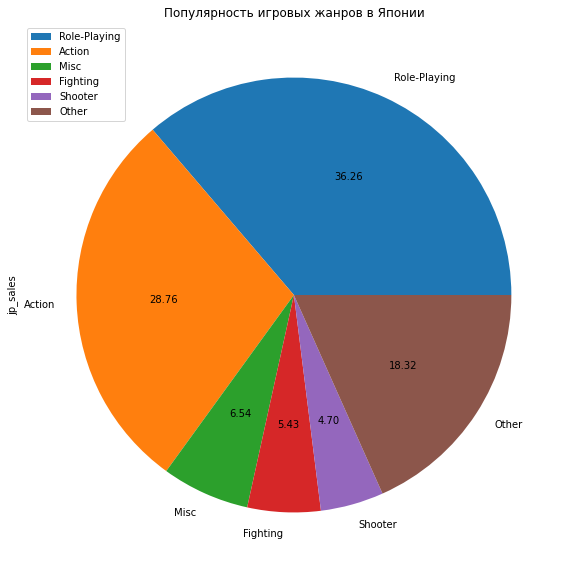

In [36]:
jp_sales = data.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)

jp_sales_top = jp_sales[:5]
jp_sales_other = pd.DataFrame([jp_sales[5:].sum()], index=['Other'])
jp_sales = jp_sales_top.append(jp_sales_other)

jp_sales.plot(kind='pie', y='jp_sales', figsize=(13,10), title='Популярность игровых жанров в Японии', autopct="%.2f")

plt.show()

**Вывод:**

Наиболее популярные жанры в Северной Америке:

* Action 29%
* Shooter 25%
* Sports 15%
* Role-Playing 11%
* Misc 6%

В Европе:

* Action 30%
* Shooter 22%
* Sports 15%
* Role-Playing 9%
* Racing 5%

В Японии:

* Role-Playing 36%
* Action 29%
* Misc 7%
* Fighting 5%
* Shooter 5%


Популярными для  всех трёх стран являются жанры Action, Role-Playing и Shooter.

В остальном данные по странам разнятся:

* Sports нравится европейцам и американцам,

* Misc - японцам и американцам,

* Racing - европейцам,

* Fighting - японцам.



### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [37]:
data['rating'] = data['rating'].fillna('DD')

In [38]:
data_rating = data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
data_rating['na_sales'] = (data_rating['na_sales']/(data_rating['na_sales'].sum())*100).astype(int)
data_rating['eu_sales'] = (data_rating['eu_sales']/(data_rating['eu_sales'].sum())*100).astype(int)
data_rating['jp_sales'] = (data_rating['jp_sales']/(data_rating['jp_sales'].sum())*100).astype(int)

data_rating

,eu_sales,jp_sales,na_sales
rating,,,
DD,20,60,20
E,21,10,18
E10+,10,4,12
M,37,10,37
T,10,14,11


**Вывод:**

Игры с рейтингом М, E и E10+ меньше покупают в Японии, большей популярностью обладают игры с рейтингом Т.

А также в Японии чаще, чем в остальных странах рейтинг не ставится вообще(DD).

# 5. Проверим гипотезы
### H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
### H1: Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [39]:
data_XOne = data[data['platform'] == 'XOne']['user_score']
data_PC = data[data['platform'] == 'PC']['user_score']

alpha = 0.05
results = st.ttest_ind(data_XOne, data_PC, nan_policy = 'omit')
print('p-value =', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу пока что нельзя')

p-value = 0.14012658403611503
Отвергнуть нулевую гипотезу пока что нельзя


**Вывод:**

Отвергнуть гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" пока что нельзя.

С большей долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.

При значении p-value = 0.14.

### H0: Средние пользовательские рейтинги жанров Action  и Sports одинаковые.
### H1: Средние пользовательские рейтинги жанров Action  и Sports разные.

Action (англ. «действие», экшен-игры)

Sports (англ. «спортивные соревнования») 

In [40]:
data_action = data[data['genre'] == 'Action']['user_score']
data_sports = data[data['genre'] == 'Sports']['user_score']

alpha = 0.05
results = st.ttest_ind(data_action, data_sports, nan_policy = 'omit')
print('p-value =', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу пока что нельзя')

p-value = 1.0517832389139422e-27
Отвергаем нулевую гипотезу


**Вывод:**

По результатам проверки гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" отклонена.

С большой долей вероятности средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия.

При значении p-value = 1.05 * 10^(-27).


# 6. Общий вывод

1. При первичном знакомстве с данными выявлено несколько интересных моментов:

* Игры, присутствующие в датасете, были выпущены в период с 1980 по 2016 годы. Больше всего игр выпустили в 2010 году.
* Оценки критиков лежат в пределах 0-100. Большая часть находится в промежутке от 50 до 90.

2. Во время предобработки данных были произведены следующие действия:

* Названия столбцов приведены к нижнему регистру
* Аббревиатура tbd заменена на NаN
* В столбцах name и year_of_release удалены строки с пропусками
* Типы данных столбцов year_of_release и user_score приведены к правильным
* В датасет добавлен новый столбец с суммарными продажами all_sales

3. При дальнейшем анализе обнаружены интересные факты:

* Среднее время существования платформы 6-9 лет. А рост продаж на них составляет примерно половину этого срока. Поскольку нас интересует прогноз на 2017 год, то в работу были взяты данные начиная с 2013 года.

* Есть две потенциально прибыльных(находящиеся в зоне роста) платформы: XOne, PS4

* Продажи мало зависят от оценки критиков, а зависимости между оценкой пользователя и продажами нет совсем(она предельно мала).

* По сводной таблице видно, что наиболее прибыльным является жанр Shooter. Sports, Platform можно так же назвать остаточно прибыльными жанрами. Misc, Role-Playin, Fighting, Simulation, Racing, Action можно отнести к среднеприбыльным. Strategy, Puzzle, Adventure - эти жанры приносят значительно меньше прибыли.

4. Составлены портреты пользователей разных регионов:

* Популярными жанрами для  всех трёх стран являются жанры Action, Role-Playing и Shooter. В остальном данные по странам разнятся.

* Sports нравится европейцам и американцам,

* Misc - японцам и американцам,

* Racing - европейцам,

* Fighting - японцам.

* 

* Топ-5 самых популярных платформ в Европе и Северной Америке совпадают. Это платформы X360, XOne, PS3, 3DS, PS4.

* В Японии же появляются новые названия: WiiU, PSV. При этом X360 и XOne в Японии менее распространены -  среди 5 наиболее популярных их нет.


* Игры с рейтингом ESRB: М, E и E10+ меньше покупают в Японии, большей популярностью обладают игры с рейтингом Т. А также в Японии чаще, чем в остальных странах рейтинг не ставится вообще(DD).

5. Проверены 2 гипотезы.

* Оказалось невозможным опровергнуть гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

* Получилось опровергнуть гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные".

# 7. Рекомендации для отдела маркетинга

1. XOne, PS4 - перспективные в плане прибыли платформы. В первую очередь следует отдавать предпочтение им.
2. В тройку самых популярных жанров входят Shooter, Sports, Platform. Причем акцент стоит сделать на Shooter. Он вдвое прибыльнее чем Sports или Platform. 
3. Популярными жанрами для  всех трёх стран являются жанры Action, Role-Playing и Shooter. Следует продвигать только их, если есть задача покрыть все рынки.
4. Для успеха на локальных рынках стоит также обратить внимание на:
* Sports, Misc для Северной Америки (20% рынка)
* Sports, Racing для Европы (20% рынка)
* Misc, Fighting для Японии (12% рынка)
5. В Японии не стоит использовать платформу XOne. Она там не очень распространена. Лучше остановиться только на PS4.